In [ ]:
 
import pandas as pd  

import matplotlib.pyplot as plt  
import seaborn as sns  



In [ ]:
df = pd.read_csv("../../diabetes_data.csv")



In [3]:
# Display the first 5 rows
df.head()


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.541858,0.498248,0.0,0.0,1.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.731936,0.442954,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.690814,0.462161,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.797459,0.401896,0.0,1.0,1.0,1.0,1.0


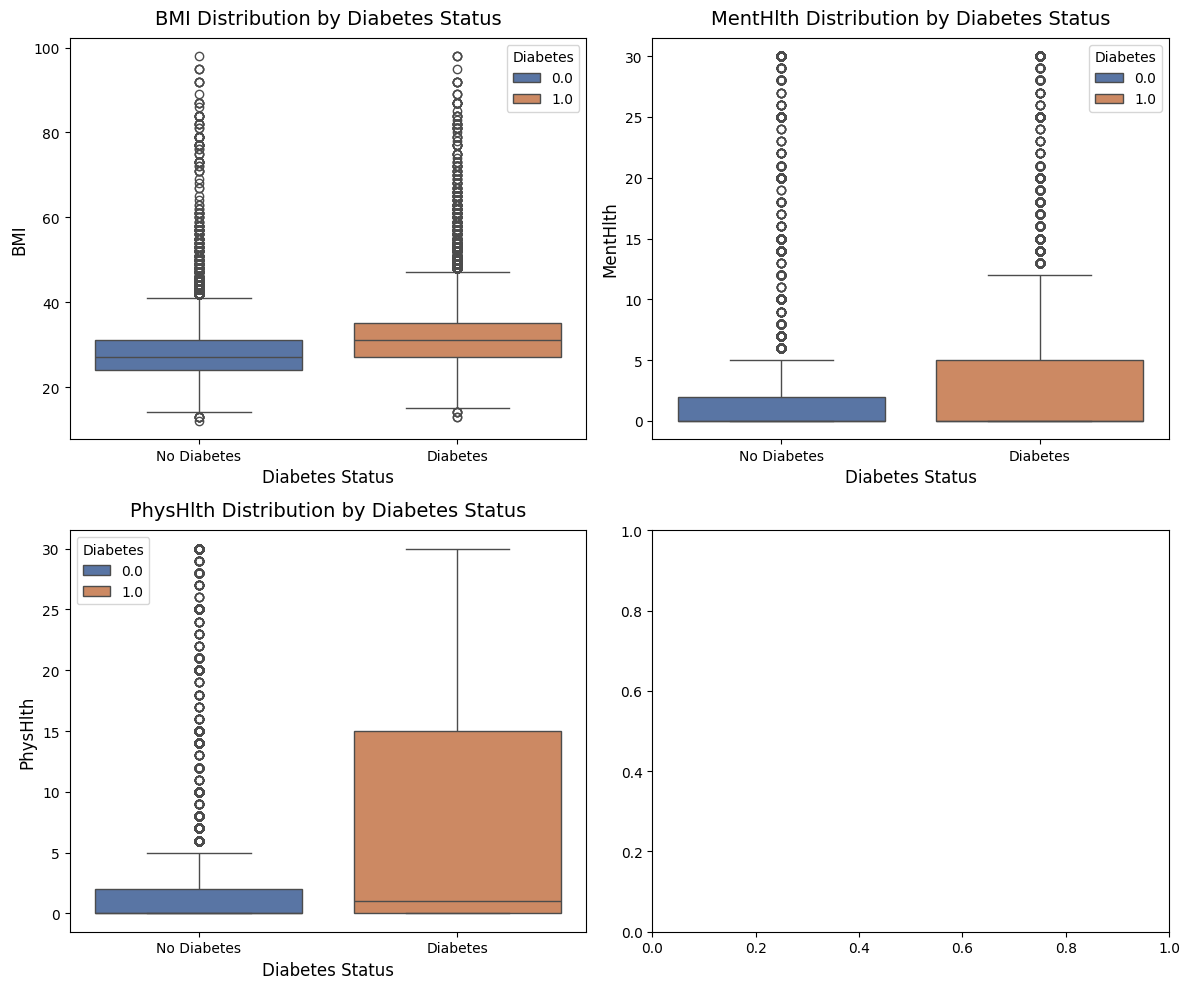

In [5]:



# List of numerical features
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the overall figure size as needed
axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array for easy iteration

# Generate boxplots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Diabetes', y=feature, data=df, hue='Diabetes', palette='deep', ax=axes[i])
    
    # Customize plot
    axes[i].set_title(f'{feature} Distribution by Diabetes Status', fontsize=14, pad=10)
    axes[i].set_xlabel('Diabetes Status', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].set_xticks(ticks=[0, 1])
    axes[i].set_xticklabels(['No Diabetes', 'Diabetes'], fontsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    
    # Special handling for GenHlth y-axis labels
    if feature == 'GenHlth':
        axes[i].set_yticks(ticks=[1, 2, 3, 4, 5])
        axes[i].set_yticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

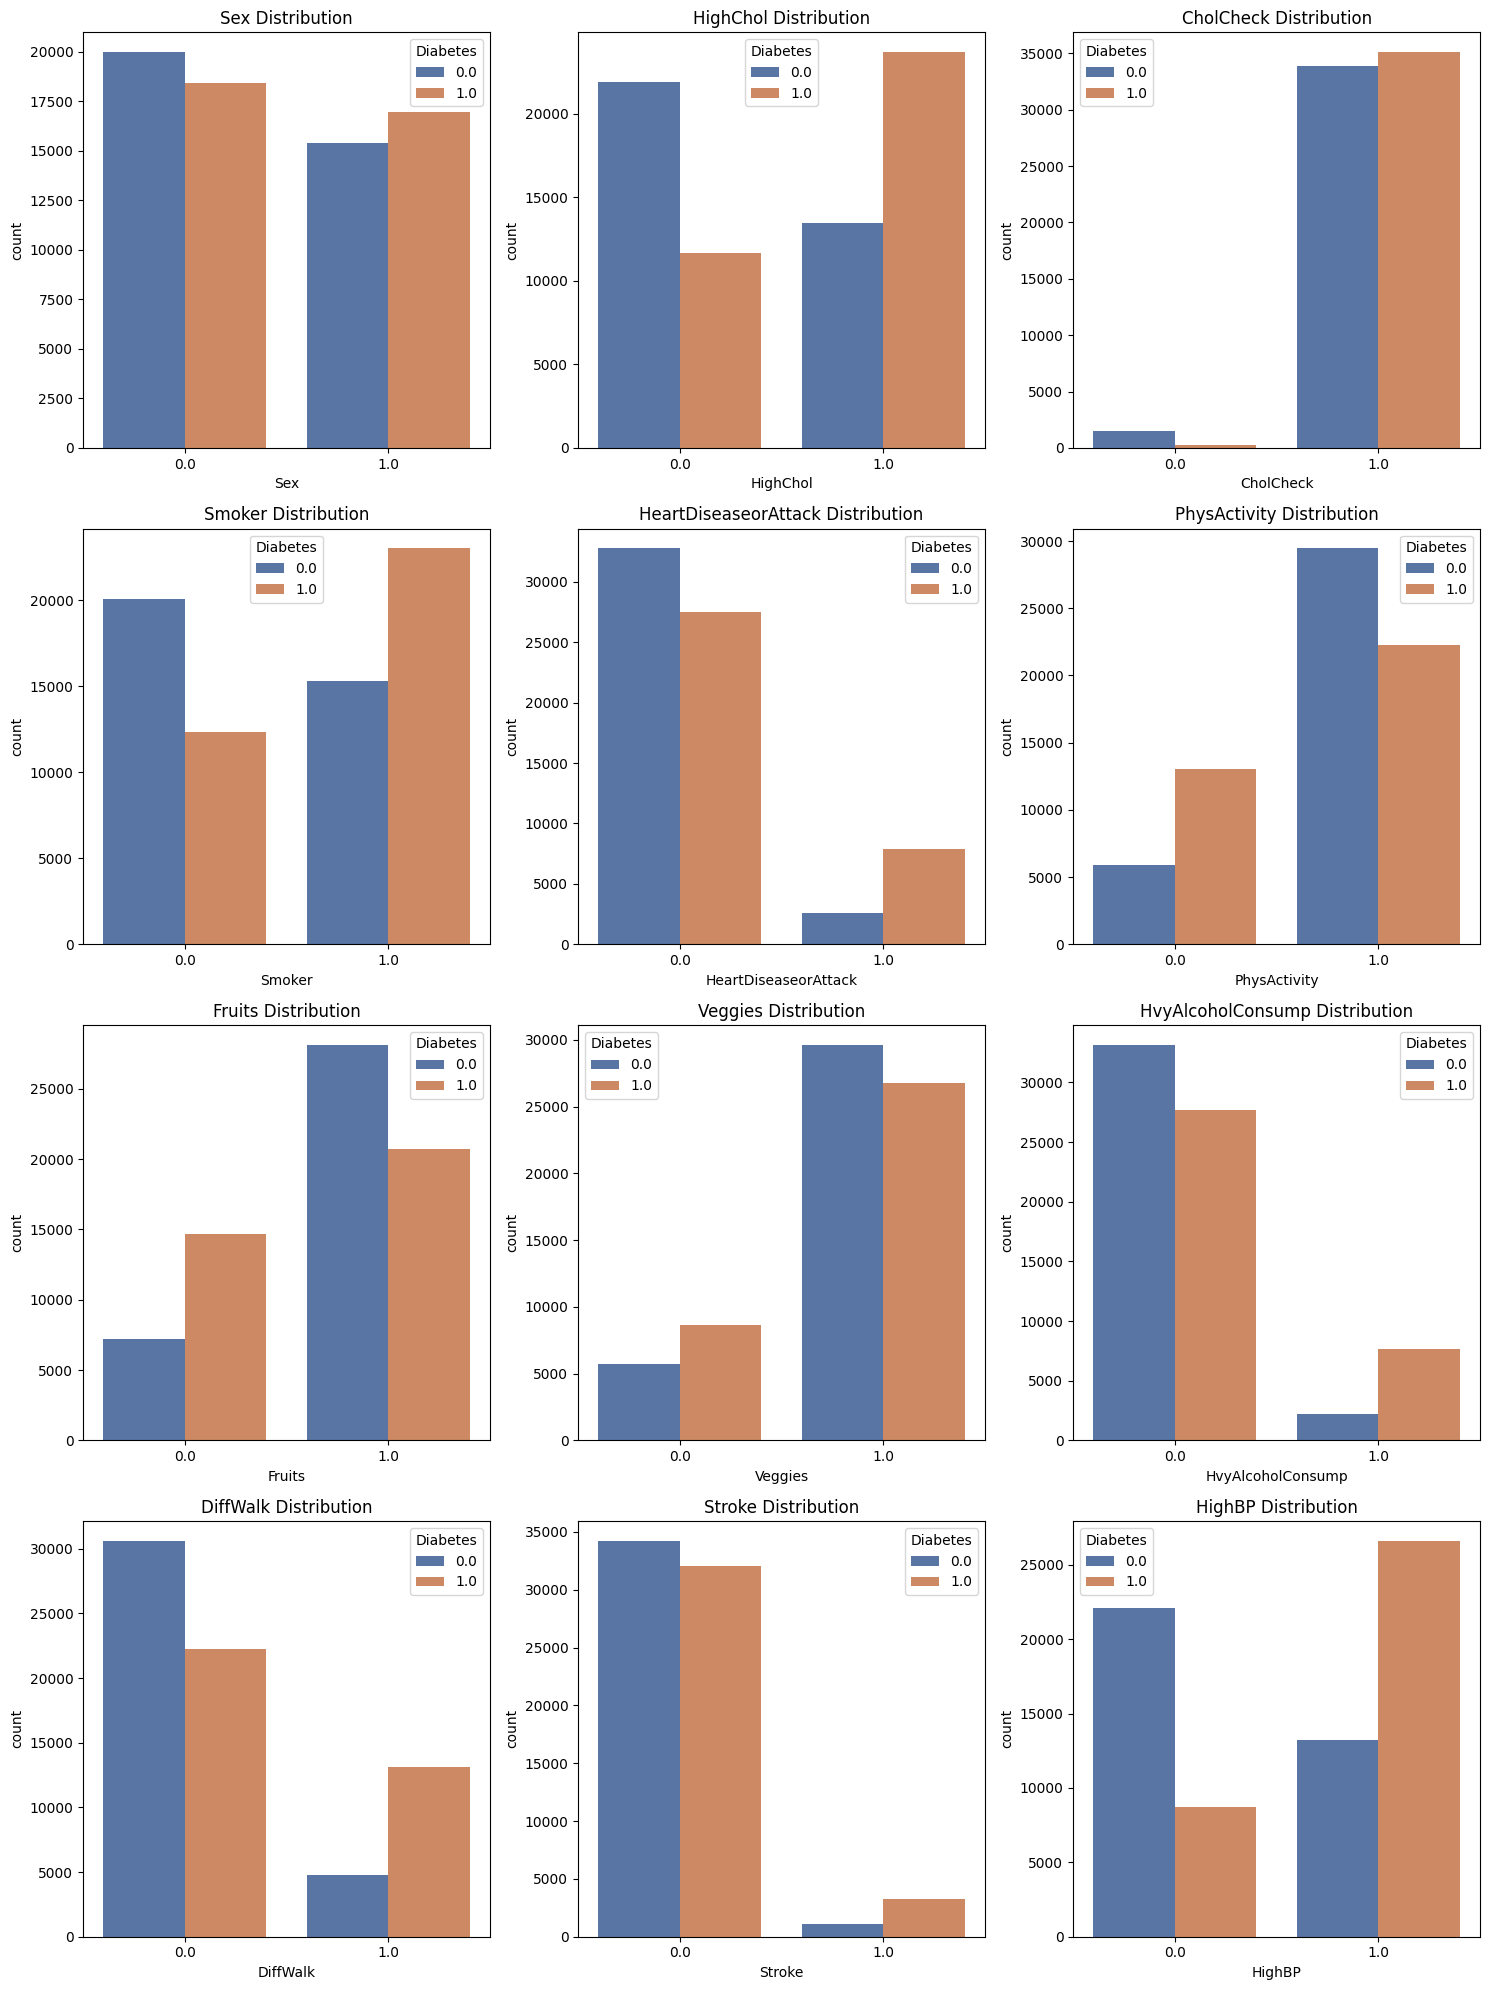

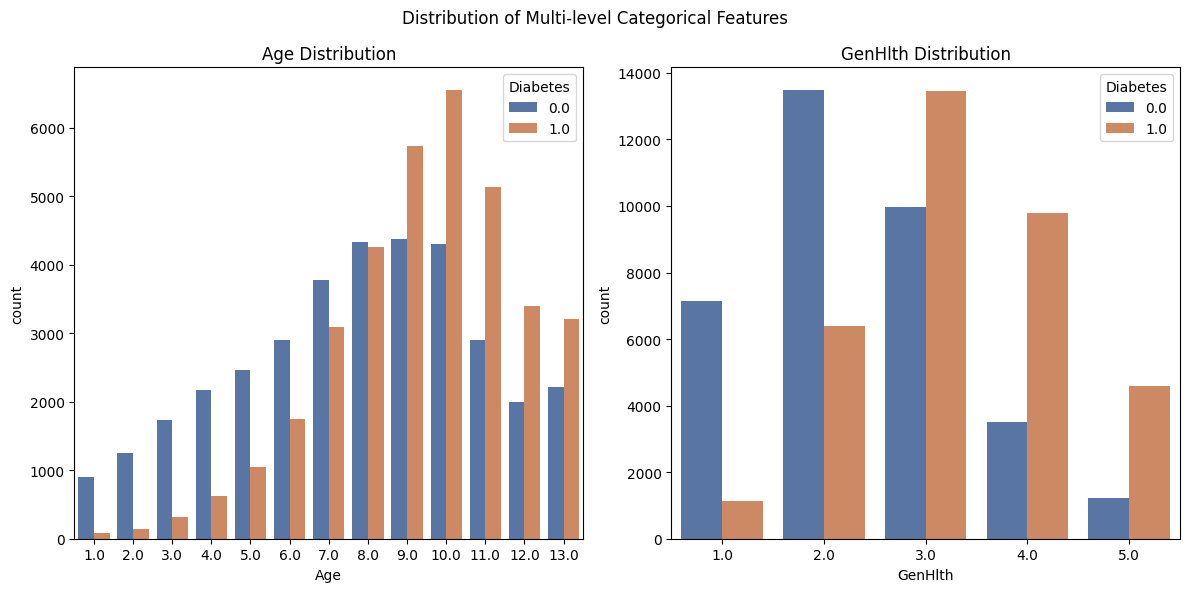

In [6]:
# Countplots for binary categorical features
binary_features = ['Sex', 'HighChol','CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 
                   'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP']
plt.figure(figsize=(15, 20))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=feature, data=df, hue='Diabetes', palette='deep')
    plt.title(f'{feature} Distribution')
#plt.suptitle('Distribution of Binary Categorical Features')
plt.tight_layout()
plt.show()

# Countplot for multi-level categorical features
multi_level_features = ['Age', 'GenHlth']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(multi_level_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, data=df, hue='Diabetes', palette='deep')
    plt.title(f'{feature} Distribution')
plt.suptitle('Distribution of Multi-level Categorical Features')
plt.tight_layout()
plt.show()

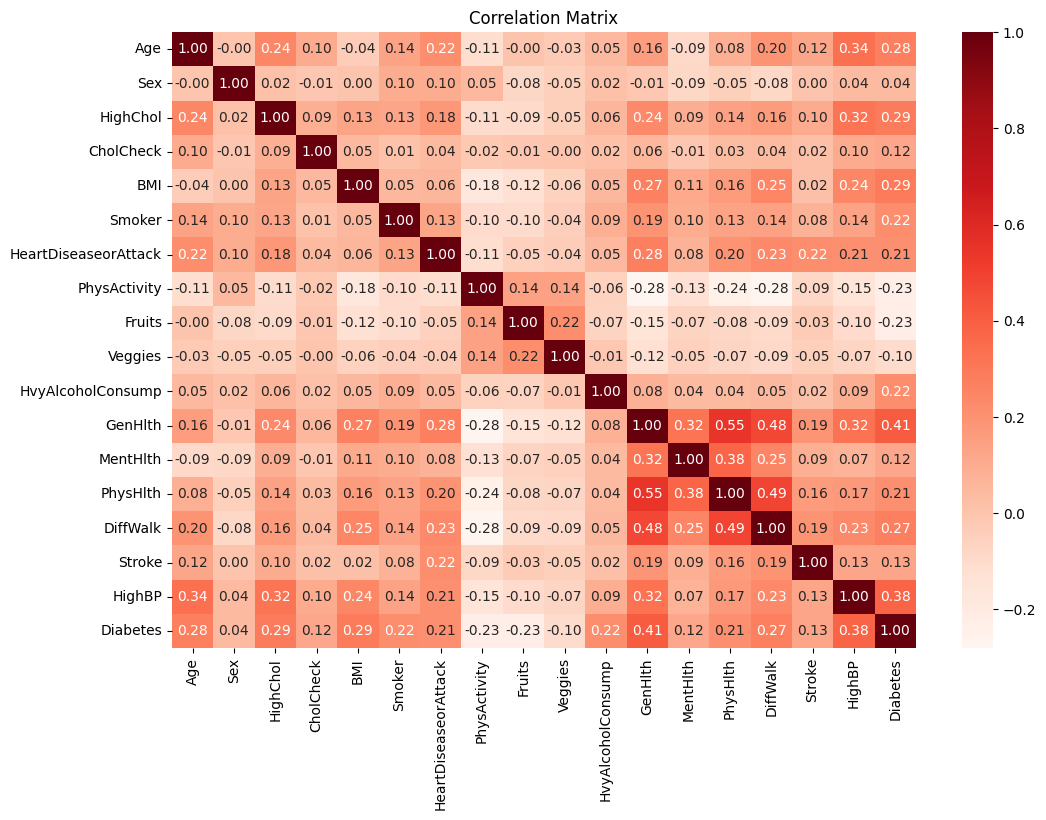

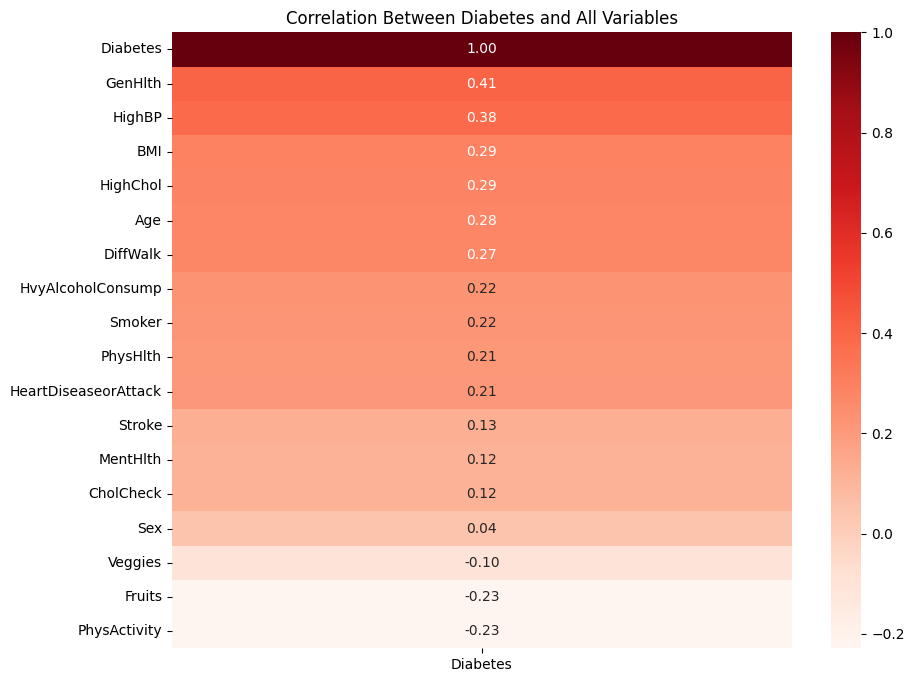

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix = df.corr()
diabetes_corr = correlation_matrix[['Diabetes']].sort_values(by='Diabetes', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_corr, annot=True, cmap='Reds', fmt='.2f', cbar=True)
plt.title('Correlation Between Diabetes and All Variables')
plt.show()


In [8]:
# Group by target variable and calculate mean for numerical features
numerical_summary = df.groupby('Diabetes')[numerical_features].mean()

# Replace 0 and 1 with "Non-Diabetes" and "Diabetes"
numerical_summary.index = numerical_summary.index.map({0: 'Non-Diabetes', 1: 'Diabetes'})

# Format the output for better readability
print("Mean of Numerical Features by Diabetes Status:")
print(numerical_summary.round(2).to_markdown())  # Use .to_markdown() for a table-like format

Mean of Numerical Features by Diabetes Status:
| Diabetes     |   BMI |   MentHlth |   PhysHlth |
|:-------------|------:|-----------:|-----------:|
| Non-Diabetes | 27.77 |       3.04 |       3.67 |
| Diabetes     | 31.94 |       4.96 |       7.95 |


In [9]:
# Group by target variable and calculate percentage for categorical features
print("\nPercentage Distribution of Categorical Features by Diabetes Status:")
for feature in binary_features + multi_level_features:
    percentage_distribution = df.groupby(feature)['Diabetes'].value_counts(normalize=True).unstack() * 100
    
    # Replace 0 and 1 with "Non-Diabetes" and "Diabetes"
    percentage_distribution.columns = ['Non-Diabetes', 'Diabetes']
    
    print(f"\n{feature}:")
    print(percentage_distribution.round(2).to_markdown())  # Use .to_markdown() for a table-like format


Percentage Distribution of Categorical Features by Diabetes Status:

Sex:
|   Sex |   Non-Diabetes |   Diabetes |
|------:|---------------:|-----------:|
|     0 |          52.04 |      47.96 |
|     1 |          47.58 |      52.42 |

HighChol:
|   HighChol |   Non-Diabetes |   Diabetes |
|-----------:|---------------:|-----------:|
|          0 |          65.22 |      34.78 |
|          1 |          36.26 |      63.74 |

CholCheck:
|   CholCheck |   Non-Diabetes |   Diabetes |
|------------:|---------------:|-----------:|
|           0 |          86.22 |      13.78 |
|           1 |          49.08 |      50.92 |

Smoker:
|   Smoker |   Non-Diabetes |   Diabetes |
|---------:|---------------:|-----------:|
|        0 |          61.95 |      38.05 |
|        1 |          39.89 |      60.11 |

HeartDiseaseorAttack:
|   HeartDiseaseorAttack |   Non-Diabetes |   Diabetes |
|-----------------------:|---------------:|-----------:|
|                      0 |          54.4  |      45.6  |
|  